### Knock airport Weather

This notebook contains the assignment 6 (assignment_6_Weather) of the Lecture 6 of the module Programming for Data Analytics. 

Author: Jennifer Ibanez Cano

In this notebook I'll analyze the data related with the Knock Airport weather. 

Using this [dataset](https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv).

The first part of the assignment consist to plot:
- The temperature.
- The mean temperature each day.
- The mean temperature for each month. 

The second part of the assigment consist to plot:
- The Windspeed.
- The rolling windspeed (over 24 hours).
- The max windspeed for each day.
- The monthly mean of the daily max windspeeds.

In [3]:
# First I'll need to import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime
import seaborn as sns

In [4]:
# Get the data. 

df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=22)
df


/var/folders/04/rjtnj1kd1_xd5wl0szndnmt80000gn/T/ipykernel_16872/126776031.py:3: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=22)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247669,31-oct-2024 20:00,0,0.2,0,10.1,0,10.1,10.1,12.4,100,...,2,5,2,220,,,0.0,,0,8
247670,31-oct-2024 21:00,0,0.1,0,10.1,0,10.1,10.0,12.4,100,...,2,5,2,230,,,0.0,,0,8
247671,31-oct-2024 22:00,0,0.0,0,10.0,0,10.0,10.0,12.3,100,...,2,4,2,210,,,0.0,,0,8
247672,31-oct-2024 23:00,0,0.1,0,9.8,0,9.8,9.8,12.1,100,...,2,6,2,200,,,0.0,,0,8


In [5]:
# Applying dropna() to remove possible NaN values, 

df = df.dropna()

In [6]:
df.dtypes

date      object
ind        int64
rain      object
ind.1      int64
temp     float64
ind.2      int64
wetb     float64
dewpt    float64
vappr    float64
rhum       int64
msl       object
ind.3      int64
wdsp      object
ind.4      int64
wddir     object
ww        object
w         object
sun      float64
vis       object
clht      object
clamt     object
dtype: object

In [7]:
# Getting the data related to the temperature and the date.

df[['date', 'temp']]

,date,temp
0,10-apr-1996 14:00,11.5
1,31-jul-1996 08:00,11.5
2,31-jul-1996 09:00,11.6
3,31-jul-1996 10:00,12.9
4,31-jul-1996 11:00,14.5
...,...,...
247669,31-oct-2024 20:00,10.1
247670,31-oct-2024 21:00,10.1
247671,31-oct-2024 22:00,10.0
247672,31-oct-2024 23:00,9.8


In [8]:
df[['date','temp']].describe()

,temp
count,247674.00000
mean,8.76682
std,4.60478
min,-6.90000
25%,5.40000
50%,8.80000
75%,12.00000
max,28.50000


In [9]:
# create new columns for day, month and year.

df['day'] = pd.DatetimeIndex(df['date']).day
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year

df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,wddir,ww,w,sun,vis,clht,clamt,day,month,year
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,25,81,0.0,35000,32,5,10,4,1996
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,25,82,0.0,40000,45,5,31,7,1996
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,80,81,0.0,8000,32,7,31,7,1996
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,25,82,0.0,28000,35,6,31,7,1996
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,2,11,0.0,40000,40,6,31,7,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247669,31-oct-2024 20:00,0,0.2,0,10.1,0,10.1,10.1,12.4,100,...,220,,,0.0,,0,8,31,10,2024
247670,31-oct-2024 21:00,0,0.1,0,10.1,0,10.1,10.0,12.4,100,...,230,,,0.0,,0,8,31,10,2024
247671,31-oct-2024 22:00,0,0.0,0,10.0,0,10.0,10.0,12.3,100,...,210,,,0.0,,0,8,31,10,2024
247672,31-oct-2024 23:00,0,0.1,0,9.8,0,9.8,9.8,12.1,100,...,200,,,0.0,,0,8,31,10,2024


In [10]:
# get the mean temperature for each day
df.groupby('date')['temp'].mean()

date
01-apr-1997 00:00     7.5
01-apr-1997 01:00     6.8
01-apr-1997 02:00     6.9
01-apr-1997 03:00     6.8
01-apr-1997 04:00     6.8
                     ... 
31-oct-2024 19:00    10.3
31-oct-2024 20:00    10.1
31-oct-2024 21:00    10.1
31-oct-2024 22:00    10.0
31-oct-2024 23:00     9.8
Name: temp, Length: 247674, dtype: float64

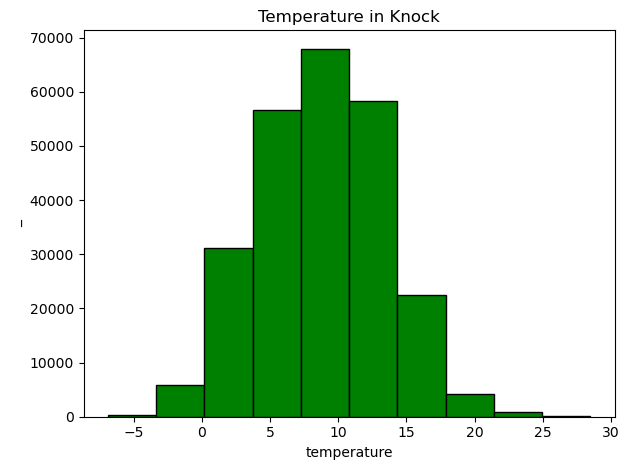

In [11]:
# Create a plot with the temperature of the whole dataset.

temperature = df['temp']

plt.hist(temperature, bins=10, color="green", edgecolor="black")
plt.title("Temperature in Knock") 
plt.xlabel("temperature")
plt.ylabel("_")
plt.tight_layout()
plt.show()

In [12]:
mean_temperature = df.groupby('day')['temp'].mean()
df.groupby('day')['temp'].mean()

day
1     8.681209
2     8.683690
3     8.580580
4     8.496853
5     8.672062
6     8.744334
7     8.798832
8     8.755961
9     8.777176
10    8.788534
11    8.688397
12    8.640376
13    8.689036
14    8.869518
15    8.858530
16    8.827630
17    8.767908
18    8.755666
19    8.808469
20    8.728171
21    8.833800
22    8.885324
23    8.971632
24    8.858088
25    8.751377
26    8.670157
27    8.681502
28    8.583665
29    8.869916
30    9.188103
31    9.004509
Name: temp, dtype: float64

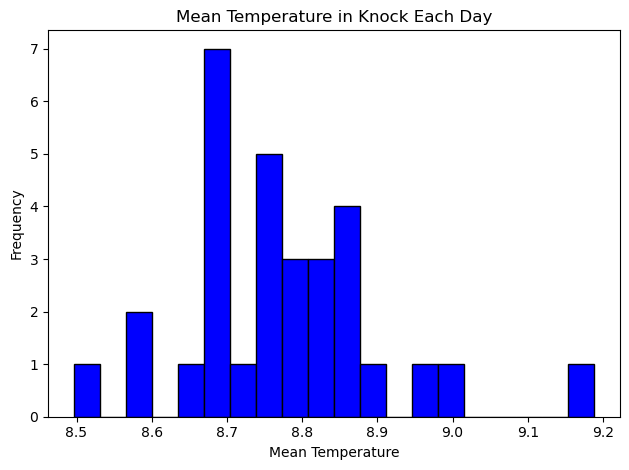

In [22]:
# Plot the mean temperature for each day
mean_temperature = df.groupby('day')['temp'].mean()

plt.hist(mean_temperature, bins=20, color="blue", edgecolor="black")
plt.title("Mean Temperature in Knock Each Day") 
plt.xlabel("Mean Temperature")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

(0.0, 20.0)

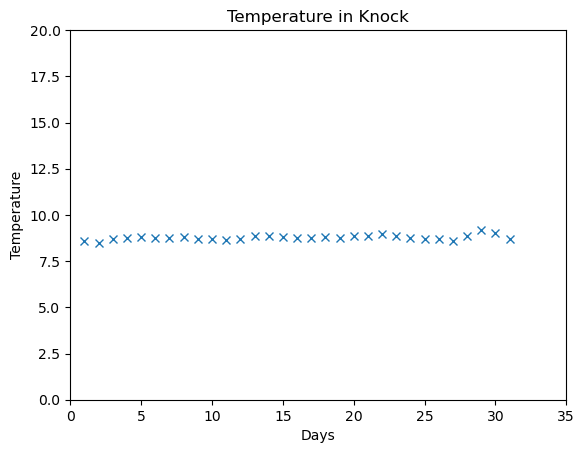

In [14]:
# Create a scatter plot with the mean temperature of the whole dataset.

unique_days = df['day'].unique()
mean_temperature = df.groupby('day')['temp'].mean()

plt.plot(unique_days, mean_temperature, 'x')

# Axis labels.
plt.xlabel('Days')
plt.ylabel('Temperature')

# Title.
plt.title('Temperature in Knock')

# X limits.
plt.xlim(0, 35)

# Y limits.
plt.ylim(0, 20)

<Axes: xlabel='day', ylabel='temp'>

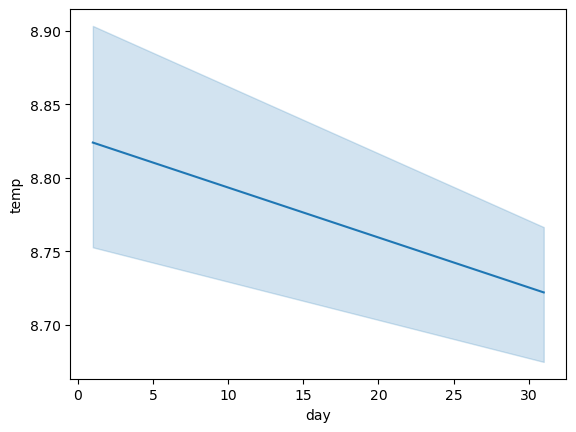

In [18]:
date = df['day']
mean_temperature = df.groupby('day')['temp'].mean()

sns.lineplot(x=date, y=mean_temperature)

In [23]:
date = df['day']
mean_temperature = df.groupby('day')['temp'].mean()

sns.lineplot(data=df.iloc[1:15], x="date", y="mean_temperature")

ValueError: Could not interpret value `mean_temperature` for `y`. An entry with this name does not appear in `data`.